In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
DATA = "/kaggle/input/heart-disease-uci/heart.csv"

In [3]:
data = pd.read_csv(DATA)

In [4]:
data.shape

(303, 14)

In [5]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Описание колонок
* **age**: The person's age in years
* **sex**: The person's sex (1 = male, 0 = female)
* **cp**: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
* **trestbps**: The person's resting blood pressure (mm Hg on admission to the hospital)
* **chol**: The person's cholesterol measurement in mg/dl
* **fbs**: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
* **restecg**: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
* **thalach**: The person's maximum heart rate achieved
* **exang**: Exercise induced angina (1 = yes; 0 = no)
* **oldpeak**: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)
* **slope**: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
* **ca**: The number of major vessels (0-3)
* **thal**: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
* **target**: Heart disease (0 = no, 1 = yes)

### Распределение по возрасту

Text(0.5, 0, 'age')

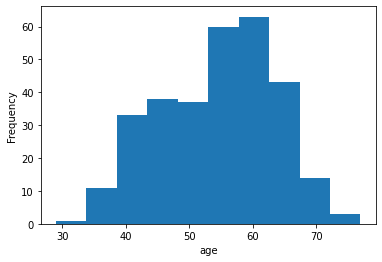

In [8]:
data.age \
    .plot(kind='hist') \
    .set_xlabel("age")

In [13]:
data.age.value_counts()

58    19
57    17
54    16
59    14
52    13
51    12
62    11
60    11
44    11
56    11
41    10
64    10
63     9
67     9
65     8
55     8
61     8
53     8
45     8
43     8
42     8
50     7
66     7
48     7
46     7
49     5
47     5
70     4
39     4
68     4
35     4
69     3
40     3
38     3
71     3
37     2
34     2
76     1
29     1
74     1
77     1
Name: age, dtype: int64

Распределение имеет перекос

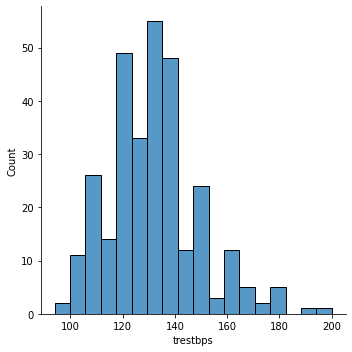

In [14]:
sns.displot(data=data, x="trestbps")

In [15]:
data['trestbps'].value_counts()

120    37
130    36
140    32
110    19
150    17
138    13
128    12
125    11
160    11
112     9
132     8
118     7
108     6
135     6
124     6
152     5
145     5
134     5
100     4
122     4
170     4
126     3
115     3
105     3
136     3
180     3
142     3
146     2
148     2
178     2
94      2
144     2
102     2
129     1
192     1
101     1
174     1
172     1
104     1
165     1
164     1
106     1
156     1
155     1
154     1
114     1
117     1
123     1
200     1
Name: trestbps, dtype: int64

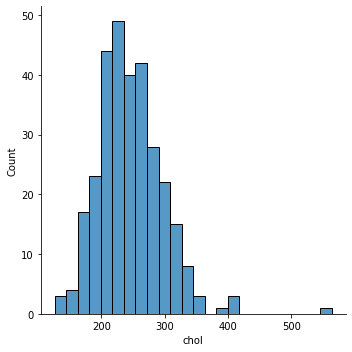

In [16]:
sns.displot(data=data, x="chol")

In [17]:
print(data[data['target'] == 0]['chol'].mean())
print(data[data['target'] == 1]['chol'].mean())

251.08695652173913
242.23030303030302


In [18]:
print(data[data['target'] == 0]['trestbps'].mean())
print(data[data['target'] == 1]['trestbps'].mean())

134.3985507246377
129.3030303030303


In [19]:
data['tr_chol'] = data['trestbps'] * data['chol']
print(data[data['target'] == 0]['tr_chol'].mean())
print(data[data['target'] == 1]['tr_chol'].mean())

33870.17391304348
31401.40606060606


Text(0.5, 0, 'sex')

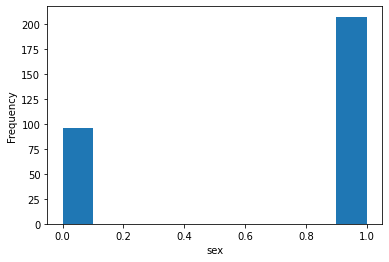

In [9]:
data.sex \
    .plot(kind='hist') \
    .set_xlabel('sex')

Число мужчин превосходит почти в 2 раза

In [10]:
data[data.cp == 4]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


Text(0.5, 0, 'Типы боли в груди')

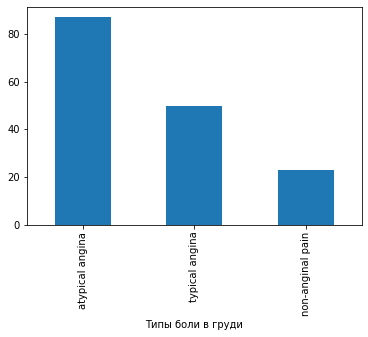

In [11]:
data.cp \
    .map({
        1: "typical angina",
        2: "atypical angina",
        3: "non-anginal pain",
        4: "asymptomatic"
    }) \
    .value_counts() \
    .plot(kind='bar', rot=90) \
    .set_xlabel('Типы боли в груди') 


Асимптоматика отсутствует полностью.
Чаще всего боль сродни болям при ангине

В итоге, у нас есть несколько категориальных признаков и несколько непрерывных. <br/>
Решаем задачу бинарной классификации. Данные разнородные, поэтому лучше всего тут подойдут градиентные методы

Посмотрим на распределение по классам 

<AxesSubplot:>

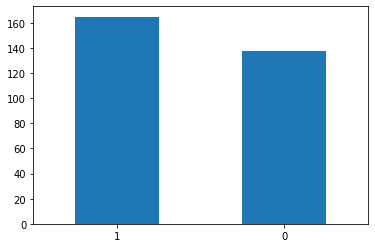

In [12]:
data.target.value_counts().plot(kind='bar', rot=0)

Можно сказать, что классы распределены сбалансированно, поэтому решать проблему дисбаланса классов не будем